# Pakages used

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits 

# Load file

In [2]:
caminho = 'combined_20250520_040914.fits'

# Data processing 

In [3]:
# Opening the file 
hdul = fits.open(caminho) 
data = hdul[0].data

# Processing
stokes = np.copy(data)
stokes = stokes.astype("float64")  

I_qs = np.mean(stokes[:,:,0,:10]) 
stokes /= I_qs

In [4]:
#  Adjusment to instrument wavelengths 
NL = 112
ll = np.linspace(0,NL-1,NL)
ll = 6302.08 + (ll-56.5)*0.0215

# Intensity Map (Continuum)

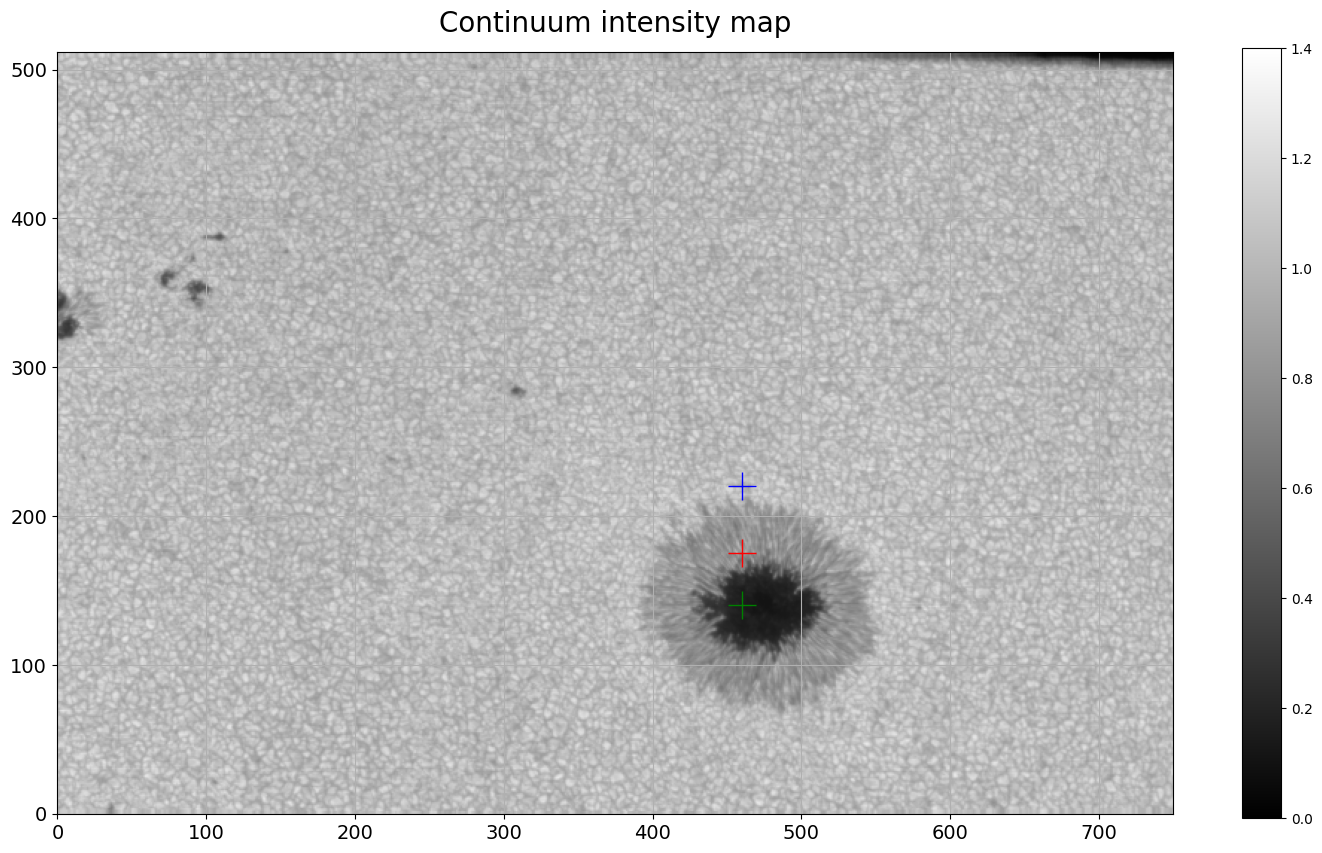

In [5]:
plt.figure(figsize=[18, 10])

plt.imshow(stokes[:,:,0,0], origin='lower', cmap='gray', vmin=0, vmax=1.4, aspect='equal')

# Three points represented on the plot by the symbol +
plt.plot(460, 175, 'r+', ms= 20)
plt.plot(460, 140 ,'g+', ms= 20)
plt.plot(460, 220 ,'b+', ms= 20)

plt.colorbar()  
plt.title("Continuum intensity map", fontsize= 20, pad= 15)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.grid()
#plt.savefig('Continnum intensity map.png', dpi=300, transparent=True, bbox_inches='tight')  

plt.show()

In [6]:
px = 460
py = 140

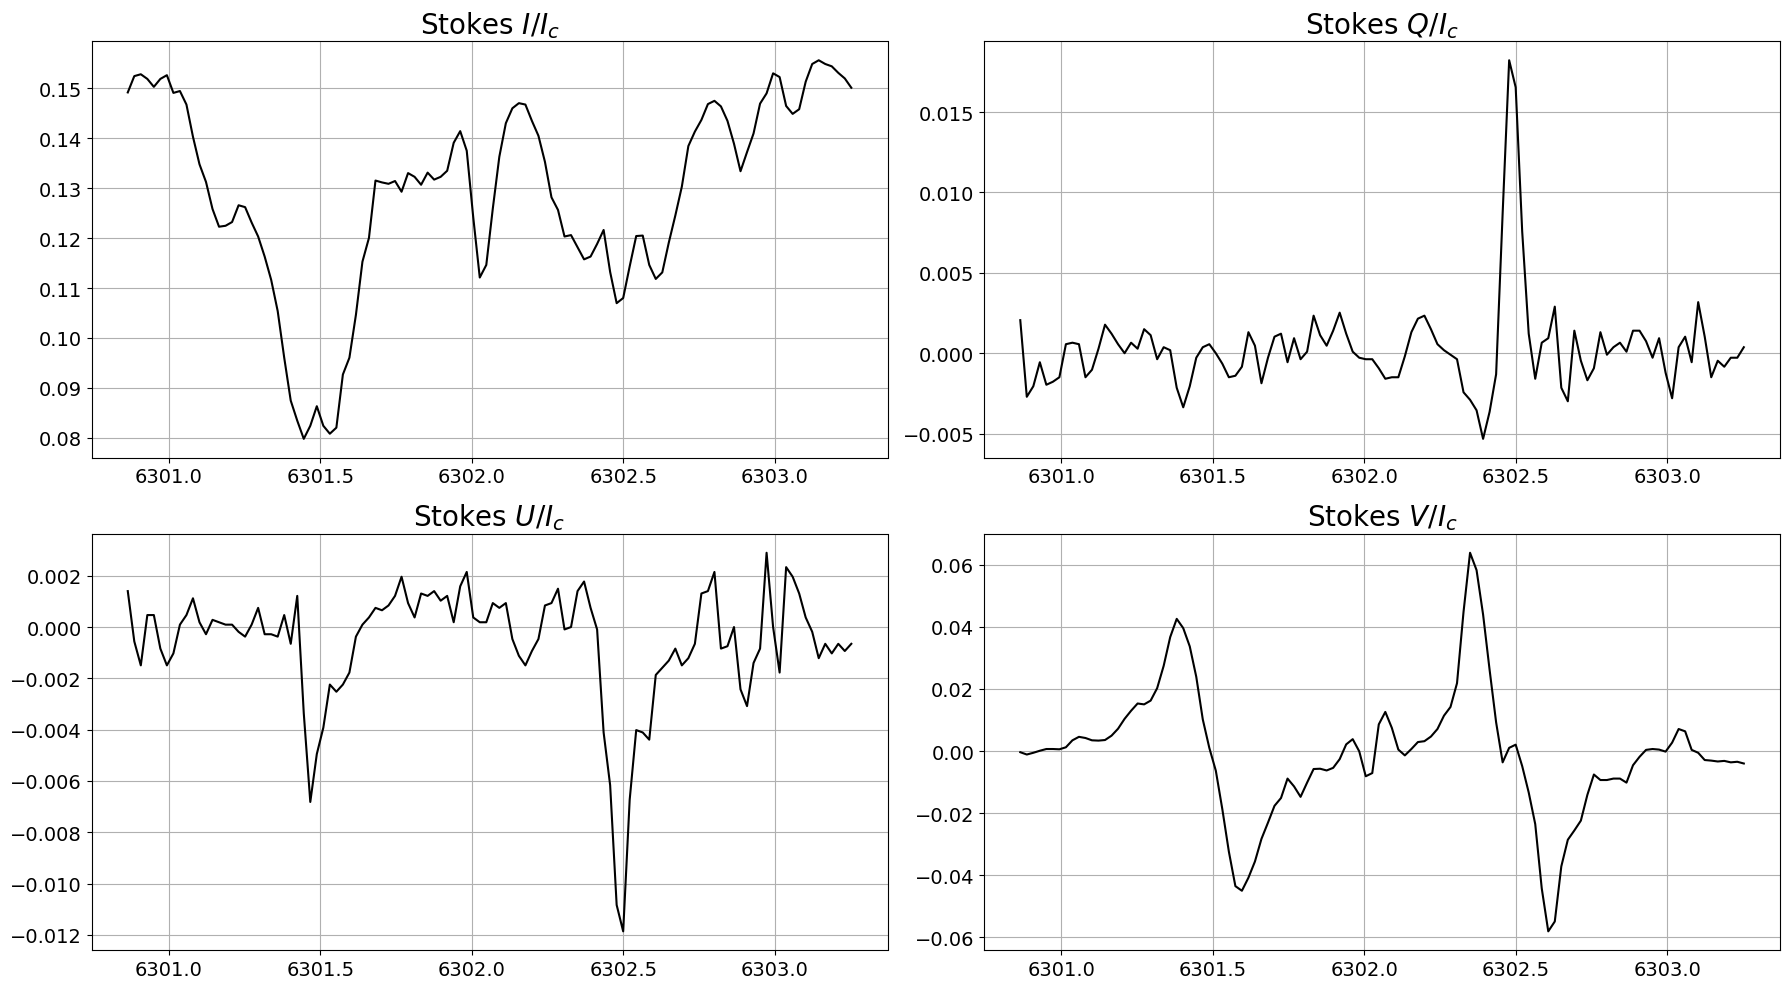

In [7]:
fig, axs = plt.subplots(2, 2, figsize=[18,10])

plt.title("Continuum intensity map")

# Stokes I/I_c
axs[0,0].plot(ll, stokes[int(py), int(px), 0,:], color = 'k' )
axs[0,0].grid()

# Stokes Q/I_c
axs[0,1].plot(ll, stokes[int(py), int(px), 1,:], color = 'k')
axs[0,1].grid()

# Stokes U/I_c
axs[1,0].plot(ll, stokes[int(py), int(px), 2,:], color = 'k')
axs[1,0].grid()

# Stokes V/I_c
axs[1,1].plot(ll, stokes[int(py), int(px), 3,:], color = 'k')
axs[1,1].grid()

axs[0,0].set_title("Stokes $I/I_c$", fontsize= 20)
axs[0,0].tick_params(axis='both', which='major', labelsize=14)
axs[0,1].set_title("Stokes $Q/I_c$", fontsize= 20)
axs[0,1].tick_params(axis='both', which='major', labelsize=14)
axs[1,0].set_title("Stokes $U/I_c$", fontsize= 20)
axs[1,0].tick_params(axis='both', which='major', labelsize=14)
axs[1,1].set_title("Stokes $V/I_c$", fontsize= 20)
axs[1,1].tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
#plt.savefig('Stokes_IQUV_POINTS.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

# Weak Field Approximation 

> We are going to use physically motivated model to relate Stokes I and Stokes V and to obtain longitudinal magnetic field. Weak field approximation implies that: 

# $$V = -4.69\times 10^{-13} \frac{dI}{d\lambda}\lambda^2 g_L B_n $$
> Where $g_L$ is the Lande factor of the line, $B_n$ is transversal magnetic field and $\lambda$ is the wavelength of the line.

> V is directly propotional to $dI/d\lambda$. So we can fit V to $dI/d\lambda$

# Plot of derivative of $dI/dl$ vs Stokes V for one of the pixels

In [8]:
# Pixel
i = py
j = px

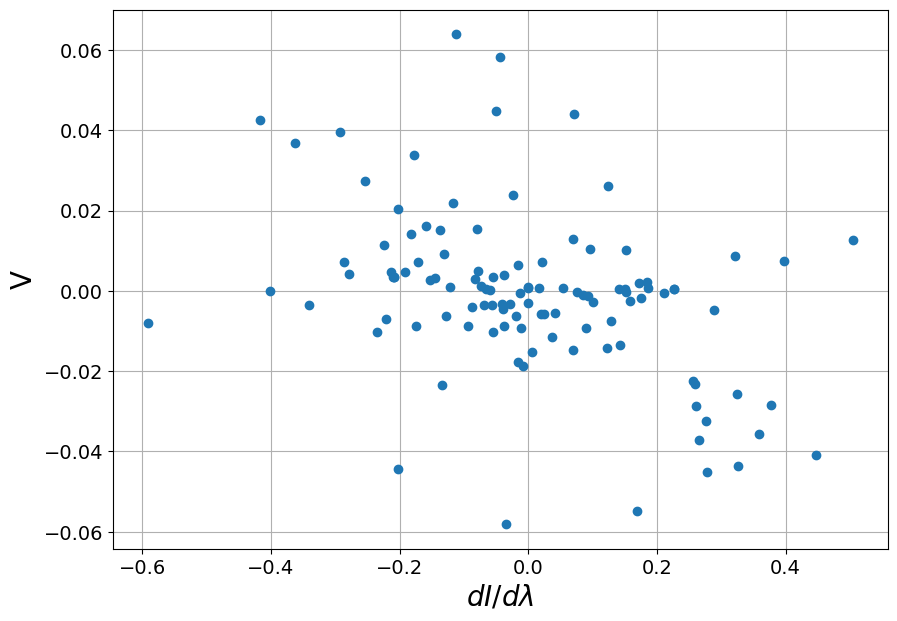

In [9]:
dI_dl = np.gradient(stokes[i,j,0]) / np.gradient(ll)

V = stokes[i,j,3]

plt.figure(figsize=[10,7])

plt.plot(dI_dl,V,'o')
plt.grid()
plt.xlabel("$dI/d\lambda$", fontsize=20)
plt.ylabel("V", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

#plt.savefig('dI_dL__V.png', dpi=300, transparent=True, bbox_inches='tight') 
plt.show()

# Spectrum cut

## Selection of 31 points around the center of the line

> ## $ll[15]$ to $ll[45]$ -- Fe I 6301.5 Angstrom center line
> ## Lande factor for Fe I 6301.5 Angstrom

> ### $g_L$ = 1.67

     > https://bass2000.obspm.fr/download/solar_spect.pdf

In [10]:
i_min = 30

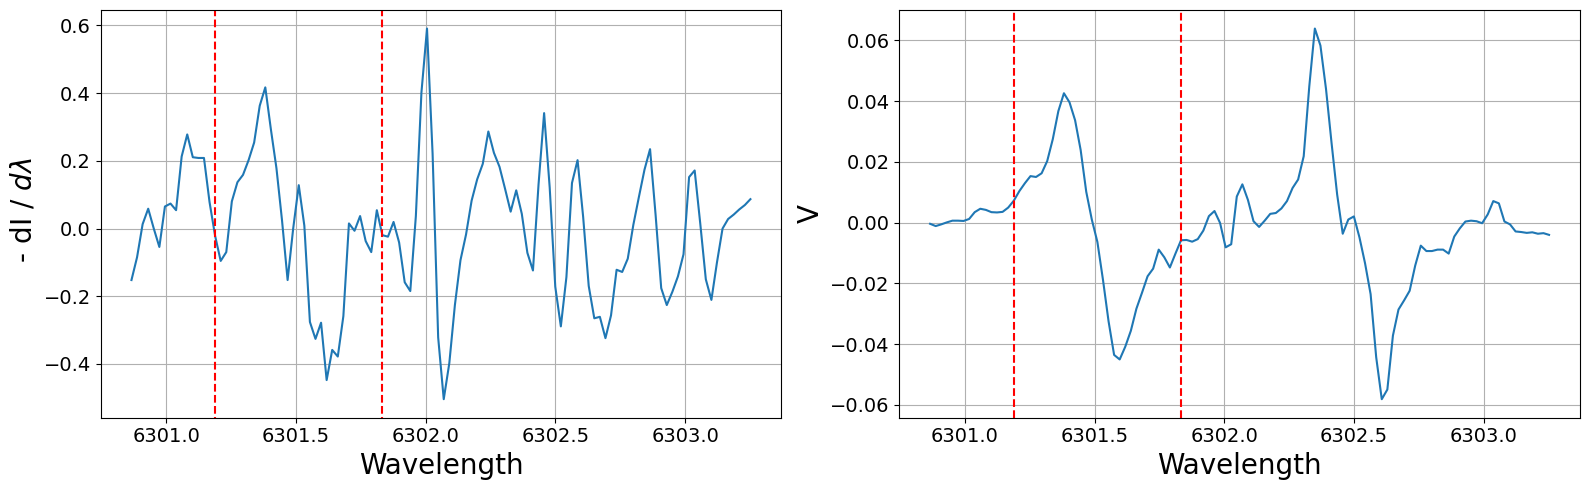

In [11]:
plt.figure(figsize=[16,5])

plt.subplot(121)
plt.plot(ll,-dI_dl)
plt.axvline(ll[i_min-15], -1, 1,  color = 'r', linestyle = 'dashed')
plt.axvline(ll[i_min+15], -1, 1,  color = 'r', linestyle = 'dashed')
plt.grid()
plt.xlabel("Wavelength", fontsize=20)
plt.ylabel(" - dI / $d\lambda$", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.subplot(122)
plt.plot(ll,V)
plt.axvline(ll[i_min-15],  color = 'r', linestyle = 'dashed')
plt.axvline(ll[i_min+15],  color = 'r', linestyle = 'dashed')
plt.xlabel("Wavelength", fontsize=20)
plt.ylabel("V", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.tight_layout()

#plt.savefig('dI_dL__V_wavelength.png', dpi=300, transparent=True, bbox_inches='tight') 

##  V is directly propotional to $dI/d\lambda$. 

>  ## For one pixel (31 points in wavelenght)

In [12]:
from sklearn.linear_model import LinearRegression

XX = dI_dl[i_min-15:i_min+16].reshape(-1, 1)
YY = V[i_min-15:i_min+16]

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(XX, YY)

# Obtendo os coeficientes
m = modelo.coef_[0]     # Inclinação (m)
c = modelo.intercept_   # Intercepto (c)

r2 = modelo.score(XX, YY)
#print(f"R² do modelo: {r2:.4f}")
print(f" R²: {r2:.4f} \n Slope:{m:.8f}\n Y-intercept:{c:.8f}")

 R²: 0.7515 
 Slope:-0.10082473
 Y-intercept:-0.00001106


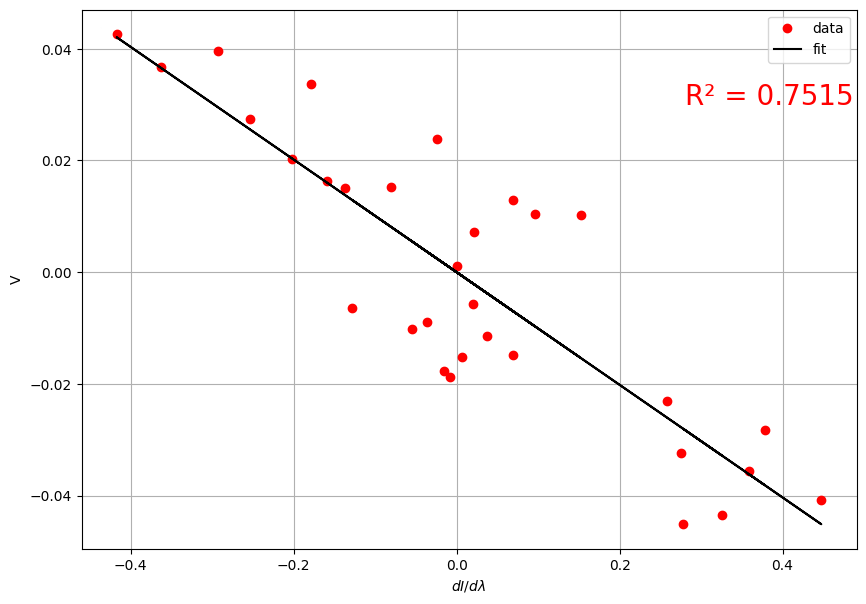

In [13]:
# Equation of the fitted line
y_ajuste = modelo.predict(XX)

# Plotting the data and fitting the line
plt.figure(figsize=[10,7])

plt.plot(XX, YY, 'o', color = 'r',  label='data')
plt.plot(XX, y_ajuste, label='fit', color = 'k')

plt.text(0.28 , 0.03, f'R² = {r2:.4f}', fontsize = 20, color='red')

plt.xlabel("$dI/d\lambda$")
plt.ylabel("V")
plt.legend()
plt.grid(True)

#plt.savefig('Projeto/dI_dL__V_fit.png', dpi=300, transparent=True, bbox_inches='tight')  # Salva com alta resolução

# Making for the entire image

In [14]:
def estimate_B(dI_dl,V,llambda0,g):
    
    ND = len(V)
    a = np.zeros([ND,2])
    a[:,0] = dI_dl[:]
    a[:,1] = 1.0
    b = V[:]

    a_inv = np.linalg.pinv(a)

    p = np.linalg.inv((a_inv @ a))@ (a_inv @ b)
    
    B = -p[0] / 4.69E-13 / llambda0**2.0 / g
    return B
    
NX = stokes.shape[0]
NY = stokes.shape[1]

B = np.zeros([NX,NY])

for i in range (0,NX):
    for j in range(0,NY):
        dI_dl_40 =  np.gradient(stokes[i,j,0,15:46]) / np.gradient(ll[15:46])
        B[i,j] = estimate_B(dI_dl_40,stokes[i,j,3,15:46],6301.5,1.67)

### Longitudinal Magnetic Field 

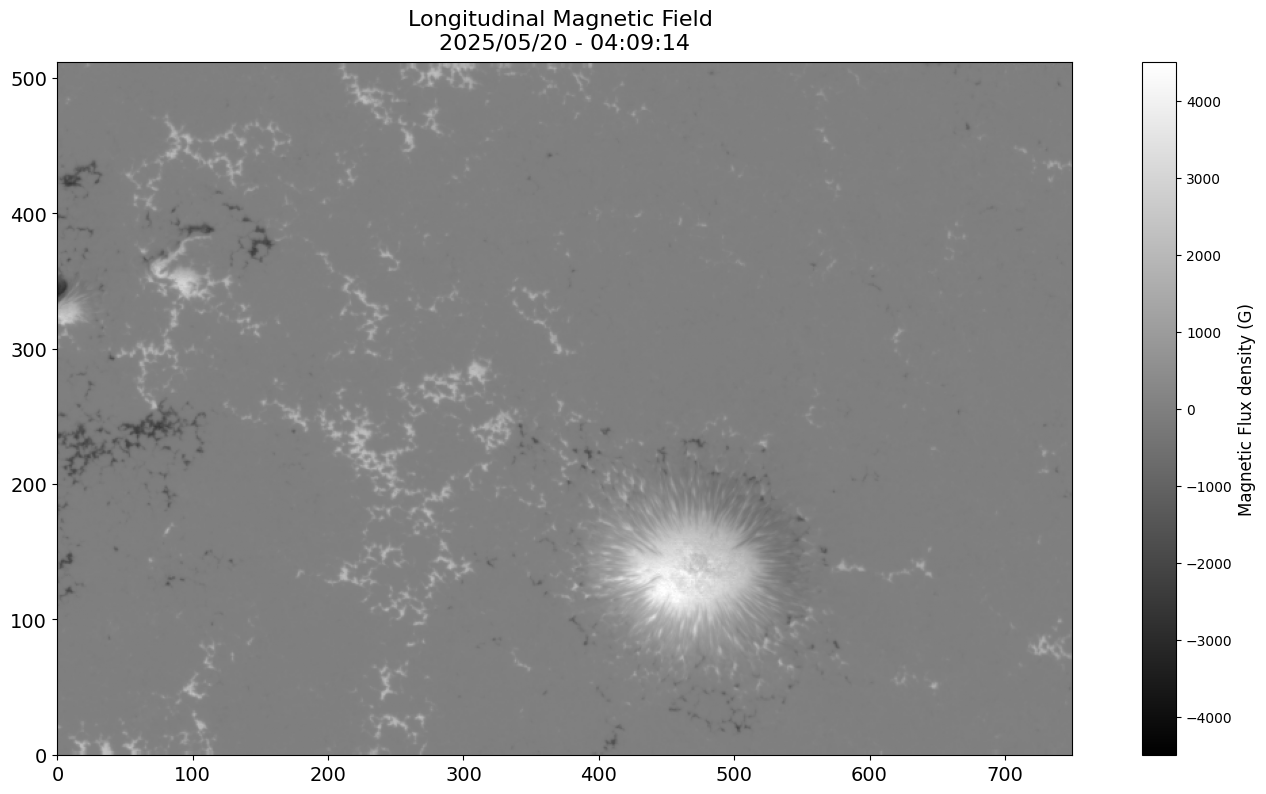

In [15]:
plt.figure(figsize=[18, 9])

plt.imshow(B,origin='lower',cmap='gray', vmin=-4500, vmax=4500)  

cbar = plt.colorbar()
cbar.set_label('Magnetic Flux density (G)', fontsize=12)

plt.title('Longitudinal Magnetic Field \n'+ caminho[9:13]+'/'+ caminho[13:15]+'/'+ caminho[15:17]+
          ' - ' + caminho[-11:-9]+':'+caminho[-9:-7]+':'+caminho[-7:-5], fontsize= 16, pad= 10)

plt.tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('Results/'+ 'Longitudinal Magnetic Field_Map_'+'AR11158_'+caminho[-11:-9]+'_'+caminho[-9:-7]+'_'+caminho[-7:-5]+'_.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()